<a href="https://colab.research.google.com/github/mosesimbahale0/MyProjects/blob/main/positon_salary_predictor0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Notes**

**The Four Assumptions of Linear Regression**



1.   **Linear relationship** - There exists a linear relationship between the independent variable, x, and the dependent variable, y.
>  The easiest way to detect if this assumption is met is to create a scatter plot of x vs. y. This allows you to visually see if there is a linear relationship between the two variables. If it looks like the points in the plot could fall along a straight line, then there exists some type of linear relationship between the two variables and this assumption is met.


**When assumption is violated**
*  Apply a nonlinear transformation to the independent and/or dependent variable. Common examples include taking the log, the square root, or the reciprocal of the independent and/or dependent variable.
*  Add another independent variable to the model. For example, if the plot of x vs. y has a parabolic shape then it might make sense to add X2 as an additional independent variable in the model.





2.  **Independence -** The residuals are independent. In particular, there is no correlation between consecutive residuals in time series data.
> The next assumption of linear regression is that the residuals are independent. This is mostly relevant when working with time series data. Ideally, we don’t want there to be a pattern among consecutive residuals. For example, residuals shouldn’t steadily grow larger as time goes on.

**Check:**
The simplest way to test if this assumption is met is to look at a residual time series plot, which is a plot of residuals vs. time. Ideally, most of the residual autocorrelations should fall within the 95% confidence bands around zero, which are located at about +/- 2-over the square root of n, where n is the sample size. You can also formally test if this assumption is met using the Durbin-Watson test.

**When assumption is violated**
* For positive serial correlation, consider adding lags of the dependent and/or independent variable to the model.
* For negative serial correlation, check to make sure that none of your variables are overdifferenced.
* For seasonal correlation, consider adding seasonal dummy variables to the model.

3. **Homoscedasticity -** the residuals have constant variance at every level of x. This is known as homoscedasticity.  When this is not the case, the residuals are said to suffer from heteroscedasticity.
> **Check** - The simplest way to detect heteroscedasticity is by creating a fitted value vs. residual plot.
Once you fit a regression line to a set of data, you can then create a scatterplot that shows the fitted values of the model vs. the residuals of those fitted values

**What to do if the assumption is violated**

Three common ways to fix heteroscedasity:
* Transform the dependent variable. One common transformation is to simply take the log of the dependent variable. For example, if we are using population size (independent variable) to predict the number of flower shops in a city (dependent variable), we may instead try to use population size to predict the log of the number of flower shops in a city. Using the log of the dependent variable, rather than the original dependent variable, often causes heteroskedasticity to go away.
*  Redefine the dependent variable.  One common way to redefine the dependent variable is to use a rate, rather than the raw value. For example, instead of using the population size to predict the number of flower shops in a city, we may instead use population size to predict the number of flower shops per capita. In most cases, this reduces the variability that naturally occurs among larger populations since we’re measuring the number of flower shops per person, rather than the sheer amount of flower shops.
* Use weighted regression. Another way to fix heteroscedasticity is to use weighted regression. This type of regression assigns a weight to each data point based on the variance of its fitted value. Essentially, this gives small weights to data points that have higher variances, which shrinks their squared residuals. When the proper weights are used, this can eliminate the problem of heteroscedasticity.

4. **Normality-** The residuals of the model are normally distributed.



> A Q-Q plot, short for quantile-quantile plot, is a type of plot that we can use to determine whether or not the residuals of a model follow a normal distribution. If the points on the plot roughly form a straight diagonal line, then the normality assumption is met.

**What to do if the assumption of normality is violated**

* First, verify that any outliers aren’t having a huge impact on the distribution. If there are outliers present, make sure that they are real values and that they aren’t data entry errors.

* Next, you can apply a nonlinear transformation to the independent and/or dependent variable. Common examples include taking the log, the square root, or the reciprocal of the independent and/or dependent variable.







# POSITION SALARY PREDICTOR MODEL

over view

**Data :** position_salaries.csv

**Objectives :**


*   To determine what salary to ofer to new employees in a firm.



*   In order to gain useful insights into the job recruitment



*   To make better decisions on salary increment- one can decide precisely what is unknown and unexpected(salary increment for certain positions)




*   To create models - To forecast future trends in salary icrements with accordance to position in a given firm (This enables firms to maintain motivated employees)



*  To develop a system that will predict the salary
based on different parameters used in company



**Machine Learning algorithm:**

 CLASSIFICATION (suspervised Learning --> Labeled data)
  
  model -> polynomial Regression





# Setup

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=12)

# Loading The Dataset




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
path ="/content/drive/MyDrive/ML/datasets/position-salaries-data.csv"
data = pd.read_csv(path)# Dataset is now stored in a Pandas Dataframe


In [ ]:
import pandas as pd
dataset = data
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values


Here X is the independent variable which is the “Level” and y is the dependent variable which is the “Salary”.



1.   So for X, we specify    

X = dataset.iloc[:, 1:2].values
2.   And for y, we specify too

 dataset.iloc[:, 2].values



# Explanatory Data Analysis

**Understanding the variables**

In [ ]:
data.head() #returns the first 5 rows of the dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
data.tail()#returns the last 5 rows of a dataset

,Position,Level,Salary
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
data.shape #returns the number of rows by the number of columns for the dataset

(10, 3)

In [ ]:
data.columns #returns the name of all of the columns in the dataset

Index(['Position', 'Level', 'Salary'], dtype='object')

In [ ]:
data.nunique(axis=0) # returns the number of unique values for each variable

Position    10
Level       10
Salary      10
dtype: int64

In [ ]:
'''
summarizes the count, mean, standard deviation, min,
and max for numeric variables. The code that follows this simply
formats each row to the regular format and suppresses scientific notation

'''

data.describe()


,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [ ]:
# took a look at the discrete variables, including



**Cleaning the dataset**

Removing Redundant variables

In [ ]:
#No redundant variables

Variable selection

In [ ]:

    #To get rid of any columns that has too many null values.
    #use the following code to remove any columns that has 40% or more of its data as null values.
    #Depending on the situation, You may want to increase or decrease the threshold.

'''

NA_val = data_cleaned.isna().sum()def na_filter(na, threshold = .4): #only select variables that passees the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/data_cleaned.shape[0]<threshold:
            col_pass.append(i)
    return col_passdata_cleaned = data_cleaned[na_filter(NA_val)]
data_cleaned.columns

'''

    #In this case there are no null values

'\n\nNA_val = data_cleaned.isna().sum()def na_filter(na, threshold = .4): #only select variables that passees the threshold\n    col_pass = []\n    for i in na.keys():\n        if na[i]/data_cleaned.shape[0]<threshold:\n            col_pass.append(i)\n    return col_passdata_cleaned = data_cleaned[na_filter(NA_val)]\ndata_cleaned.columns\n\n'

Removing Outliers

In [ ]:
# set boundaries and remove any outliers

Removing rows with null values

In [ ]:
# use .dropna(axis=0) to remove any rows with null values.
#This dataset doesn't have any rows with null values as it is evident below

data_clean = data.dropna(axis=0)
data_clean.shape

(10, 3)

**Analyzing relationships between the variables**

*Correlation Matrix*

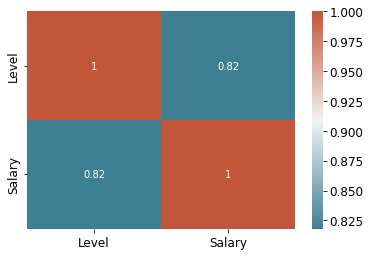

In [ ]:
#correlation is a measurement that describes the relationship between two variables

#correlation matrix is a table that shows the correlation coefficients between many variables

# calculate correlation matrix

import seaborn as sns # Python data visualization library built on top of Matplotlib.

corr = data_clean.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))



*Scatterplot*

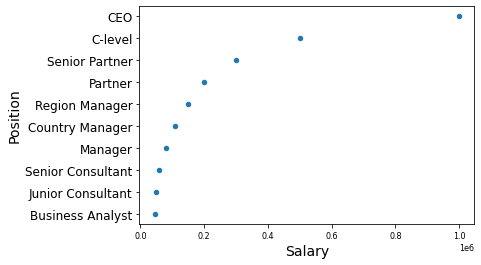

In [ ]:
#A scatterplot is a type of graph which ‘plots’ the values of two variables along two axes, like Position and Salary.
# The plot below shows relationship between position and salary
data_clean.plot(kind='scatter', x='Salary', y='Position')

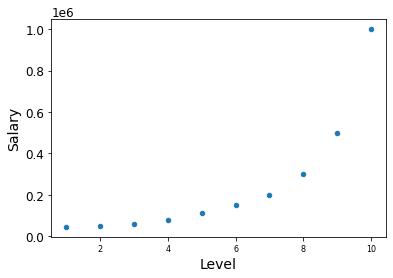

In [ ]:
# The plot below shows relationship between Salary and level
data_clean.plot(kind='scatter', x='Level', y='Salary')

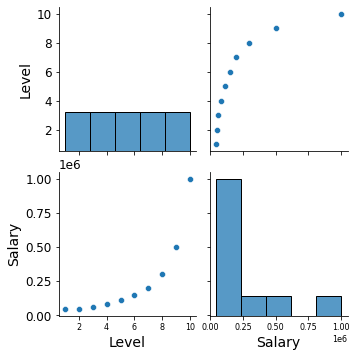

In [ ]:
#sns.pairplot() is a great way to create scatterplots between all of the variables.
sns.pairplot(data_clean)

*Histogram*

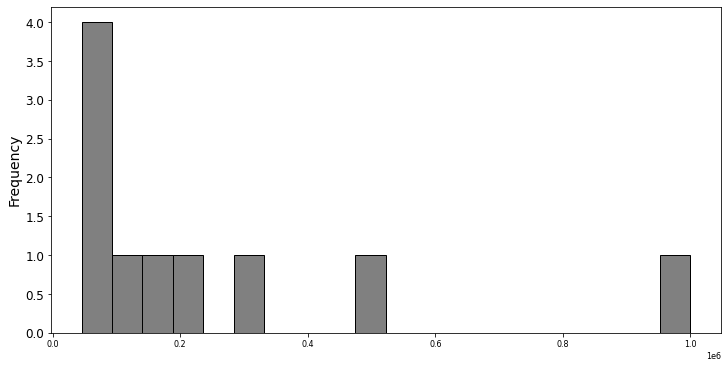

In [ ]:
#Useful especially when exploring a single variable
data_clean['Salary'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')



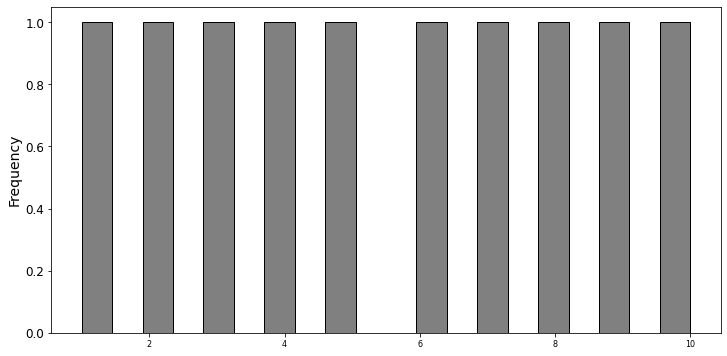

In [ ]:
data_clean['Level'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

*Box Plot*

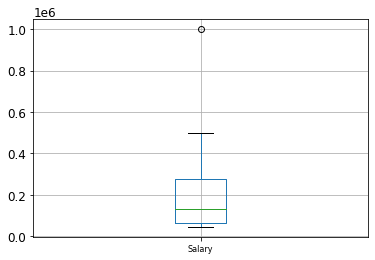

In [ ]:
#Another way to visualize the distribution of a variable

# Boxplots are not as intuitive as the other graphs, but it communicates a lot of information in its own way

data_clean.boxplot('Salary')

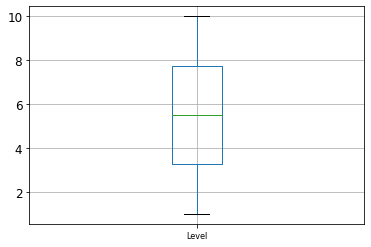

In [ ]:
data_clean.boxplot('Level')

# FITTING LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [ ]:
np.array(X)

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
np.array(y)

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

# VISUALIZING LINEAR REGRESSION RESULTS

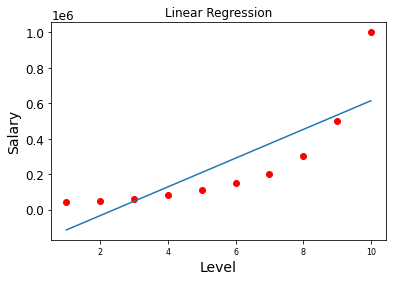

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X,y, color="red")
plt.plot(X, lin_reg.predict(X))
plt.title("Linear Regression")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()


If we look at the graph above, we can see that a person at level 4.5 should be offered a salary of around $100k.


let's predict and see

In [ ]:
lin_reg.predict([[4.5]])

array([168621.21212121])


We can see that the predicton is way off as it predicts $168k

# CONVERTING X TO POLYNOMIAL FORMAT

For Polynomial Regression, we need to transform our matrix X to X_poly where X_poly will contain X to the power of n — depending upon the degree we choose.
If we choose degree 2, then X_poly will contain X and X to the power 2.
If we choose degree 3, then X_poly will contain X, X to the power 2 and X to the power 3.
We will be using the PolynomialFeatures class from the sklearn.preprocessing library for this purpose. When we create an object of this class — we have to pass the degree parameter.
Let’s begin by choosing degree as 2. Then we call the fit_transform method to transform matrix X.


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)

**Take a look at X_poly**

In [ ]:
df = pd.DataFrame (X_poly)
index=['0','1']
df

,0,1,2,3,4
0,1.0,1.0,1.0,1.0,1.0
1,1.0,2.0,4.0,8.0,16.0
2,1.0,3.0,9.0,27.0,81.0
3,1.0,4.0,16.0,64.0,256.0
4,1.0,5.0,25.0,125.0,625.0
5,1.0,6.0,36.0,216.0,1296.0
6,1.0,7.0,49.0,343.0,2401.0
7,1.0,8.0,64.0,512.0,4096.0
8,1.0,9.0,81.0,729.0,6561.0
9,1.0,10.0,100.0,1000.0,10000.0


# FITTING POLYNOMIAL REGRESSION

Now we will create a new linear regression object called lin_reg_2 and pass X_poly to it instead of X that we passed in Step 2.


In [ ]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)


LinearRegression()

# VISUALIZING POLYNOMIAL REGRESSION RESULTS and PREDICTING IT'S RESULTS

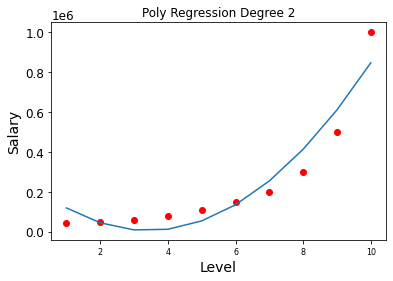

The predicted salary of a person at 4.5 Level is  [27740.53030303]


In [ ]:
# degree to 2

#  Convert X to polynomial format
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

 # Passing X_poly to LinearRegression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

# Visualize Poly Regression Results
plt.scatter(X,y, color="red")
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)))
plt.title("Poly Regression Degree 2")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

# Polynomial Regression prediction
new_salary_pred = lin_reg_2.predict(poly_reg.fit_transform([[4.5]]))
print('The predicted salary of a person at 4.5 Level is ',new_salary_pred)


# CHANGING DEGREE FROM 2 UPTO 8 and TO SEE IF WE GET BETTER RESULTS

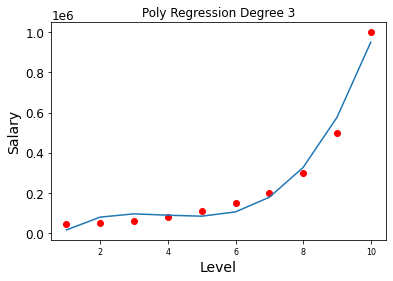

The predicted salary of a person at 4.5 Level is  [83979.16666666]


In [ ]:
# Change degree to 3

# Convert X to polynomial format
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)

 # Passing X_poly to LinearRegression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

# Visualize Poly Regression Results
plt.scatter(X,y, color="red")
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)))
plt.title("Poly Regression Degree 3")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

# Polynomial Regression prediction
new_salary_pred = lin_reg_2.predict(poly_reg.fit_transform([[4.5]]))
print('The predicted salary of a person at 4.5 Level is ',new_salary_pred)

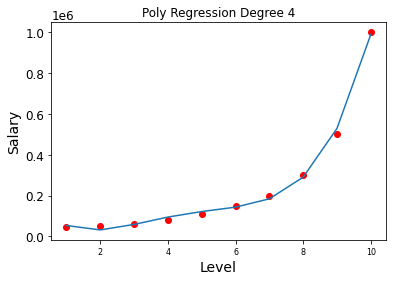

The predicted salary of a person at 4.5 Level is  [109582.14962119]


In [ ]:
# Change degree to 4

# Convert X to polynomial format
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)

 # Passing X_poly to LinearRegression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

# Visualize Poly Regression Results
plt.scatter(X,y, color="red")
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)))
plt.title("Poly Regression Degree 4")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

# Polynomial Regression prediction
new_salary_pred = lin_reg_2.predict(poly_reg.fit_transform([[4.5]]))
print('The predicted salary of a person at 4.5 Level is ',new_salary_pred)

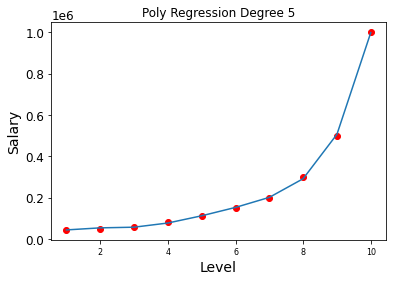

The predicted salary of a person at 4.5 Level is  [93566.52462195]


In [ ]:
# Change degree to 5

# Convert X to polynomial format
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(X)

 # Passing X_poly to LinearRegression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

# Visualize Poly Regression Results
plt.scatter(X,y, color="red")
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)))
plt.title("Poly Regression Degree 5")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

# Polynomial Regression prediction
new_salary_pred = lin_reg_2.predict(poly_reg.fit_transform([[4.5]]))
print('The predicted salary of a person at 4.5 Level is ',new_salary_pred)

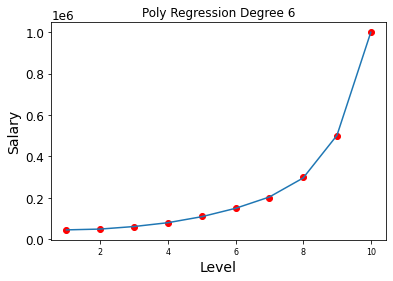

The predicted salary of a person at 4.5 Level is  [92881.26627569]


In [ ]:
# Change degree to 6

# Convert X to polynomial format
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=6)
X_poly = poly_reg.fit_transform(X)

 #  Passing X_poly to LinearRegression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

# Visualize Poly Regression Results
plt.scatter(X,y, color="red")
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)))
plt.title("Poly Regression Degree 6")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

# Polynomial Regression prediction
new_salary_pred = lin_reg_2.predict(poly_reg.fit_transform([[4.5]]))
print('The predicted salary of a person at 4.5 Level is ',new_salary_pred)

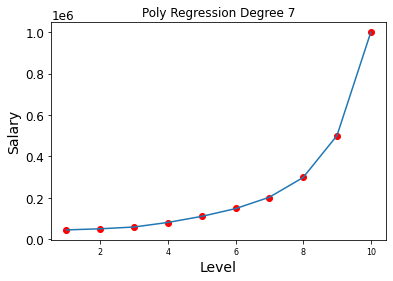

The predicted salary of a person at 4.5 Level is  [94965.70939995]


In [ ]:
# Change degree to 7

# Convert X to polynomial format
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=7)
X_poly = poly_reg.fit_transform(X)

 #  Passing X_poly to LinearRegression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

# Visualize Poly Regression Results
plt.scatter(X,y, color="red")
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)))
plt.title("Poly Regression Degree 7")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

# Polynomial Regression prediction
new_salary_pred = lin_reg_2.predict(poly_reg.fit_transform([[4.5]]))
print('The predicted salary of a person at 4.5 Level is ',new_salary_pred)

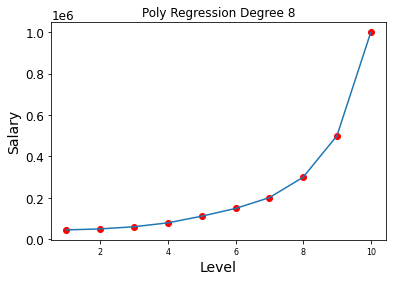

The predicted salary of a person at 4.5 Level is  [94160.98305869]


In [ ]:
# Change degree to 8

# Convert X to polynomial format
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=8)
X_poly = poly_reg.fit_transform(X)

 #  Passing X_poly to LinearRegression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

# Visualize Poly Regression Results
plt.scatter(X,y, color="red")
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)))
plt.title("Poly Regression Degree 8")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

# Polynomial Regression prediction
new_salary_pred = lin_reg_2.predict(poly_reg.fit_transform([[4.5]]))
print('The predicted salary of a person at 4.5 Level is ',new_salary_pred)

# CONCLUSION

In [ ]:
# Polynomial Regression prediction
new_salary_pred = lin_reg_2.predict(poly_reg.fit_transform([[4]]))
print('The predicted salary of a person at 4 Level is ',new_salary_pred)

The predicted salary of a person at 4 Level is  [79127.52191287]


So in this case by using Linear Regression — at level 4.5 we got a prediction of $168k and

by using Polynomial Regression we got a prediction of 94k.

A prediction of 79,127 at level 4 instead of 80,000  an accuracy of 98.908%